<a href="https://colab.research.google.com/github/Brian-Mwangi-developer/Audio-classification/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Classification

Data URL =https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing

## Install Dependencies

In [1]:
!pip install tensorflow==2.8.0 tensorflow-io==0.24.0 tensorflow-gpu==2.8.0  matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found exi

## Load Dependecies

In [2]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

#2.Build Data Loading Function

##2.1 Define Paths to Files


In [3]:
CAPUCHIN_FILE=os.path.join('/content/drive/MyDrive/data','Parsed_Capuchinbird_Clips','XC114131-3.wav')
NOT_CAPUCHIN_FILE=os.path.join('/content/drive/MyDrive/data','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [4]:
NOT_CAPUCHIN_FILE

'/content/drive/MyDrive/data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

In [5]:
CAPUCHIN_FILE

'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC114131-3.wav'

##2.2 Build DataLoading Function

In [6]:
def load_wav_16k_mono(filename):
  #load encoded wav file
  file_contents = tf.io.read_file(filename)
  #Decode was (tensor by channels)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
  #Remove trailing axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  #Goes from 44100Hz to 16000Hz - amplitude of the audio signal
  wav = tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
  return wav

##2.3 Plot Wave

In [7]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [8]:
wave

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 1.0372845e-07, -1.8943592e-07,  8.3630546e-08, ...,
        5.0718607e-03,  2.9685488e-03, -4.4082543e-03], dtype=float32)>

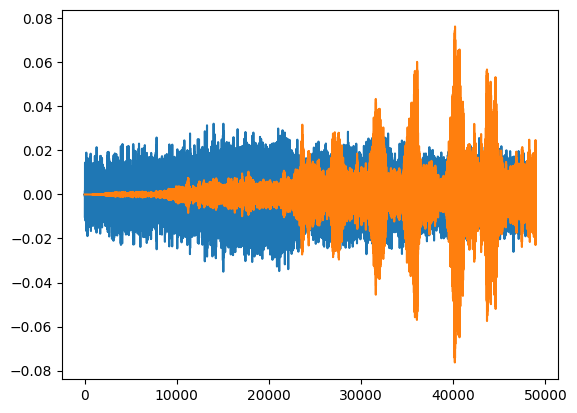

In [9]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

#3. Create TensorFlow Dataset

##3.1 Define the Paths to Positive and Negative Data

In [10]:
POS=os.path.join('/content/drive/MyDrive/data','Parsed_Capuchinbird_Clips')
NEG=os.path.join('/content/drive/MyDrive/data','Parsed_Not_Capuchinbird_Clips')

## Create TensorFlow Dataset

In [11]:
pos= tf.data.Dataset.list_files(POS+'/*.wav')
neg= tf.data.Dataset.list_files(NEG+'/*.wav')

In [12]:
pos.as_numpy_iterator().next()

b'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC22397-7.wav'

##3.3 Add Labels and Combine Positive and Negative Samples

In [13]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [14]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [15]:
negatives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/data/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-47.wav',
 0.0)

# 4. Determine Average Length of a Capuchin call

##4.1 Calculate Wave Cycle Length

In [16]:
lengths=[]
for file in os.listdir(os.path.join('/content/drive/MyDrive/data','Parsed_Capuchinbird_Clips')):
  tensor_wave = load_wav_16k_mono(os.path.join('/content/drive/MyDrive/data','Parsed_Capuchinbird_Clips', file))
  lengths.append(len(tensor_wave))

In [17]:
lengths

[40000,
 48000,
 56000,
 48000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 40000,
 48000,
 64000,
 56000,
 56000,
 64000,
 64000,
 64000,
 56000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 56000,
 64000,
 40000,
 64000,
 32000,
 56000,
 40000,
 64000,
 48000,
 56000,
 56000,
 48000,
 64000,
 64000,
 48000,
 48000,
 56000,
 48000,
 48000,
 56000,
 64000,
 48000,
 48000,
 40000,
 48000,
 40000,
 56000,
 48000,
 56000,
 48000,
 48000,
 56000,
 56000,
 56000,
 40000,
 48000,
 48000,
 56000,
 40000,
 56000,
 56000,
 64000,
 64000,
 72000,
 40000,
 64000,
 64000,
 56000,
 64000,
 56000,
 48000,
 56000,
 48000,
 56000,
 56000,
 56000,
 40000,
 56000,
 56000,
 56000,
 48000,
 56000,
 48000,
 48000,
 56000,
 56000,
 40000,
 56000,
 64000,
 64000,
 48000,
 48000,
 64000,
 48000,
 48000,
 48000,
 64000,
 64000,
 48000,
 56000,
 56000,
 64000,
 56000,
 48000,
 64000,
 64000,
 56000,
 48000,
 56000,
 48000,
 64000,
 56000,
 32000,
 40000,
 48000,
 48000,
 40000,


##4.2 Calculate Mean,Min,Max

In [18]:
#Mean
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [19]:
#min
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [20]:
#Max
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

#5. Build Preprocessing Function to Convert to Spectogram

##5.1 Build Preprocessing Function

In [21]:
def preprocess(file_path, label):
  wav = load_wav_16k_mono(file_path)
  wav = wav[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)# check how many zeros need to be added by minus from 48000 samples
  wav = tf.concat([zero_padding, wav],0)#add zeros if the the size is less than 48,000, add to the length which is represented by 0
  spectogram = tf.signal.stft(wav, frame_length=320, frame_step=32)# means each chunk of audio will contain 320 samples. function will move forward 32 samples to create the next frame, Spectogram- visual representation of sound
  spectogram = tf.abs(spectogram)# Change any Negative value to positive
  #The spectrogram is originally 2D (time and frequency). Here, we expand it to 3D by adding an extra dimension (axis=2),
  # making it compatible with certain machine learning models (like convolutional neural networks, which work with 3D data).
  spectogram = tf.expand_dims(spectogram, axis=2)#since its one channel
  return spectogram, label

##5.2 Test out the Function and Viz the Spectogram

In [22]:
filepath,label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [23]:
spectogram,label = preprocess(filepath,label)

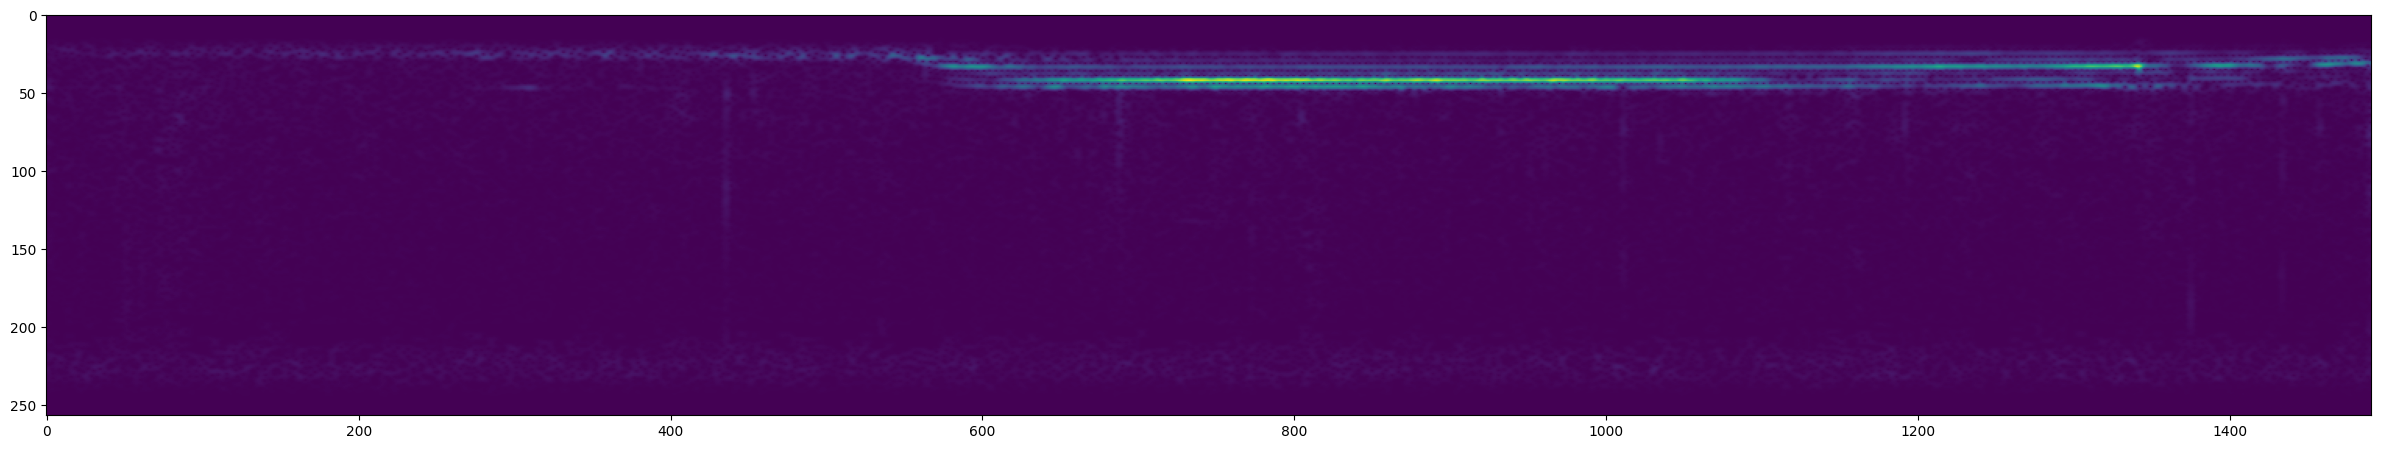

In [24]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()
#

#6.Create Training and Testing Partitions

##6.1 Create a Tensorflow Data Pipeline

In [25]:
data.as_numpy_iterator().next()

(b'/content/drive/MyDrive/data/Parsed_Capuchinbird_Clips/XC520626-3.wav', 1.0)

In [26]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

##6.2 Split into Training and Testing Partitions

In [27]:
len(data)*.7 #70% training Data

35.699999999999996

In [28]:
train = data.take(36)
test = data.skip(36).take(15)


##6.3 Test One Batch

In [29]:
samples,labels = train.as_numpy_iterator().next()

In [30]:
samples.shape

(16, 1491, 257, 1)

#7. Build Deep Learning Model

##7.1 Load Tensorflow Dependencies

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

##7.2 Build Sequential Model, Compile and View Summary

In [32]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16,(3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation="sigmoid"))

In [33]:
#Compile
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


##7.3 Fit Model, View Loss and KPI Plots

In [35]:
hist=model.fit(train, epochs=5, validation_data=test)

Epoch 1/5
36/36 [==============================] - 184s 5s/step - loss: 2.3109 - recall: 0.8531 - precision: 0.7625 - val_loss: 0.4765 - val_recall: 0.7971 - val_precision: 1.0000
Epoch 2/5
36/36 [==============================] - 179s 5s/step - loss: 0.0865 - recall: 0.9667 - precision: 0.9732 - val_loss: 0.0018 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/5
36/36 [==============================] - 176s 5s/step - loss: 0.0617 - recall: 0.9865 - precision: 0.9865 - val_loss: 0.0383 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/5
36/36 [==============================] - 178s 5s/step - loss: 0.0100 - recall: 0.9934 - precision: 1.0000 - val_loss: 7.0575e-04 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 5/5
36/36 [==============================] - 179s 5s/step - loss: 0.0314 - recall: 0.9935 - precision: 0.9935 - val_loss: 0.0060 - val_recall: 1.0000 - val_precision: 1.0000


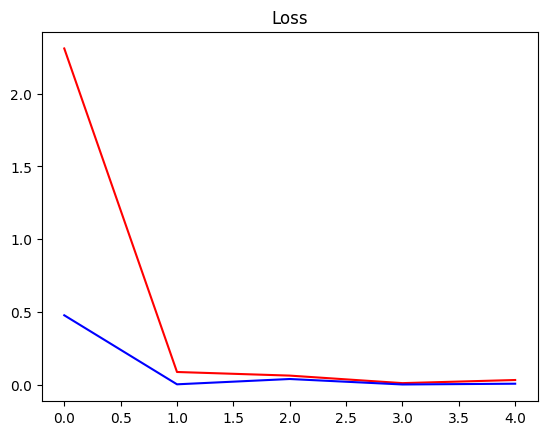

In [36]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

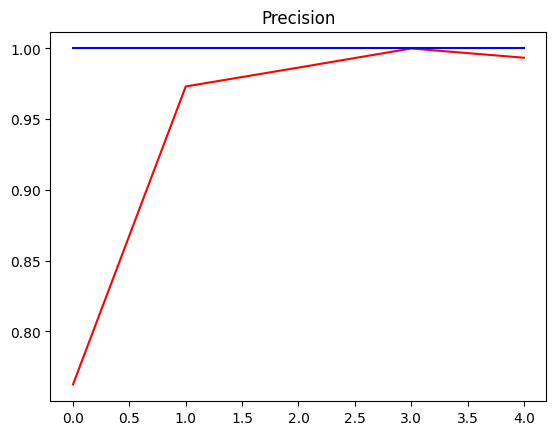

In [37]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

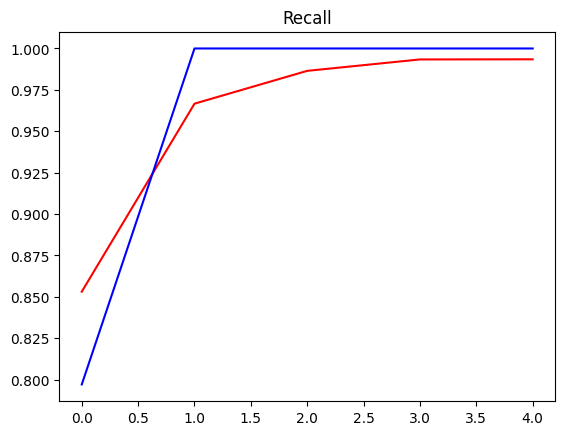

In [38]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

#8 Make a Prediction on a Single Clip

##8.1 Get One Batch and Make a Prediction

In [50]:
X_test,Y_test = test.as_numpy_iterator().next()

In [51]:
Y_test.shape

(16,)

In [52]:
yhat = model.predict(X_test)

In [53]:
yhat

array([[5.7587109e-22],
       [1.0000000e+00],
       [5.3752518e-36],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.9453416e-06],
       [4.9336272e-01],
       [1.0000000e+00],
       [2.0311428e-31],
       [5.0584094e-22],
       [9.2668657e-13],
       [1.9447599e-37],
       [6.5845013e-10],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.2236296e-09]], dtype=float32)

##8.2 Convert Logits to Classes

In [54]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [55]:
yhat

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [56]:
#Check Number of Capuchin found in prediction
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [57]:
tf.math.reduce_sum(Y_test) #Actual capuchin found in thr Y_test 4

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

#9. Build Forest Parsing Functions

##9.1 Load up MP3s

In [58]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [59]:
mp3 = os.path.join('/content/drive/MyDrive/data','Forest Recordings','recording_00.mp3')

In [60]:
wav=load_mp3_16k_mono(mp3)

In [61]:
audio_slices =tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [62]:
samples,index = audio_slices.as_numpy_iterator().next()

In [64]:
len(audio_slices)

60

In [63]:
samples.shape

(1, 48000)

##9.2 Build Function to Convert Clips into Windowed **Spectograms**

In [65]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

##9.3 Convert Longer Clips into Windows and Make Predictions

In [69]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)


In [91]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.999 else 0 for prediction in yhat]

In [85]:
len(yhat)

60

In [92]:
yhat

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

##9.4 Group Consecutive Detections

In [93]:
from itertools import groupby

In [94]:
yhat = [key for key, group in groupby(yhat)]

In [95]:
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [96]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [97]:
calls = tf.math.reduce_sum(yhat).numpy()

In [98]:
calls

5

#10 Make predictions

##10.1 Loop over all recordings and make predictions

In [99]:
results ={}
for file in os.listdir(os.path.join('/content/drive/MyDrive/data','Forest Recordings')):
  FILEPATH = os.path.join('/content/drive/MyDrive/data','Forest Recordings', file)
  wav = load_mp3_16k_mono(FILEPATH)
  audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
  audio_slices = audio_slices.map(preprocess_mp3)
  audio_slices = audio_slices.batch(64)

  yhat = model.predict(audio_slices)
  results[file] = yhat

In [101]:
results

{'recording_00.mp3': array([[5.63782632e-01],
        [1.39196157e-01],
        [1.37558043e-01],
        [9.99998808e-01],
        [1.00000000e+00],
        [5.86628914e-04],
        [3.40312719e-03],
        [2.47125626e-01],
        [7.94798136e-04],
        [1.80016994e-01],
        [7.86042809e-02],
        [9.20474827e-02],
        [2.64962912e-02],
        [1.00000000e+00],
        [1.00000000e+00],
        [9.45189595e-03],
        [1.34924835e-14],
        [2.13078856e-02],
        [3.74109328e-01],
        [6.15327179e-01],
        [3.84982139e-01],
        [8.16278756e-02],
        [7.59451330e-01],
        [9.99976635e-01],
        [1.00000000e+00],
        [4.23741694e-05],
        [6.56211996e-05],
        [4.17305052e-01],
        [6.43119216e-02],
        [2.21449941e-01],
        [2.15629339e-02],
        [5.53697586e-01],
        [1.40696764e-04],
        [4.97294764e-07],
        [7.29144692e-01],
        [2.52668858e-02],
        [1.00000000e+00],
        [2.8685335

##10.2 Convert the Predictions into Classes

In [104]:
class_preds = {}
for file, logits in results.items():
  class_preds[file] = [1 if prediction > 0.9999 else 0 for prediction in logits]
  class_preds

In [102]:
class_preds

{'recording_00.mp3': [0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

##10.3 Group Consecutive Detections

In [105]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 6,
 'recording_05.mp3': 0,
 'recording_06.mp3': 7,
 'recording_07.mp3': 2,
 'recording_08.mp3': 25,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 3,
 'recording_12.mp3': 0,
 'recording_13.mp3': 0,
 'recording_14.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 5,
 'recording_17.mp3': 6,
 'recording_19.mp3': 0,
 'recording_18.mp3': 4,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 5,
 'recording_26.mp3': 2,
 'recording_27.mp3': 0,
 'recording_24.mp3': 0,
 'recording_25.mp3': 6,
 'recording_28.mp3': 8,
 'recording_29.mp3': 0,
 'recording_31.mp3': 1,
 'recording_30.mp3': 3,
 'recording_32.mp3': 2,
 'recording_33.mp3': 0,
 'recording_35.mp3': 0,
 'recording_34.mp3': 4,
 'recording_37.mp3': 5,
 'recording_36.mp3': 0,
 'recording_38.mp3': 4,
 'recording_41.mp3': 0,
 'recording_40.mp3': 1,
 'recording_42.

#11. Export Results

In [106]:
import csv

In [107]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])